# Sex Education and Public Health Outcomes

Hypotheses: 

1. States with no sex ed requirement have higher rates of HIV
2. States with no sex ed requirement have higher rates of STDs
3. States with no sex ed requirement have higher rates of teen pregnancy
4. States with no contraceptive requirement have higher rates of teen pregnancy
5. States that emphasize/stress (?) abstinence only education have higher rates of STDs
6. States that emphasize/stress (?) abstinence only education have higher rates of teen pregnancy
7. States that emphasize/stress (?) abstinence only education have higher rates of HIV
8. Are the racial disparities wider? 

Second set of hypotheses: 

A. States with higher rates of teen pregnancy are less likely to have sex ed

B. States with higher rates of teen pregnancy are less likely to teach contraception

C. States with higher rates of teen pregnancy are more likely to teach abstinence 

D. States with higher rates of teen pregnancy are less likely to teach consent


E. States with higher rates of HIV/STDs are less likely to have sex ed

F. States with higher rates of HIV/STDs are less likely to teach contraception

G. States with higher rates of HIV/STDs are more likely to teach abstinence 

H. States with higher rates of HIV/STDs are less likely to teach consent

...and the racial disparities associated with those 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os

preg_str = "..//data//processed//etl_1_preg_state.csv"
preg_race_str = "..//data//processed//etl_3_preg_state_race.csv"
state_str = "..//data//processed//etl_2_HIV_STD_state.csv"
state_race_str = "..//data//processed//etl_4_HIV_STD_state_race.csv"

sex_ed_policy_str = "..//data//manual//Sex_Ed_Policy.csv"

In [2]:
# read in file with public health indicators (asides from teen births)
state = pd.read_csv(state_str)

# teen pregnancy
preg = pd.read_csv(preg_str)

In [3]:
sex_ed_policy = pd.read_csv(sex_ed_policy_str)
sex_ed_policy.head()

,State,SIECUS sex-ed req EDITED,SIECUS consent req EDITED,SIECUS contraception req,Abortion,Abstinence (SIECUS)
0,Alabama,NaN,NaN,"Cover, limited",Most Restrictive,2.0
1,Alaska,NaN,NaN,NaN,NaN,NaN
2,Arizona,NaN,NaN,NaN,Restrictive,2.0
3,Arkansas,NaN,NaN,NaN,Most Restrictive,2.0
4,California,1.0,NaN,"Cover, expansive",NaN,1.0


## HIV + sex ed requirement

1. States with no sex ed requirement have higher rates of HIV


In [4]:
STI_HIV_merge = sex_ed_policy.merge(state, left_on= "State", right_on="Geography")

# drop DC
STI_HIV_merge = STI_HIV_merge[STI_HIV_merge.State != "District of Columbia"]

In [5]:
STI_HIV_merge.groupby("SIECUS sex-ed req EDITED", dropna = False).mean()

,SIECUS consent req EDITED,Abstinence (SIECUS),Chlamydia,"Early Non-Primary, Non-Secondary Syphilis",Gonorrhea,HIV prevalence,Primary and Secondary Syphilis
SIECUS sex-ed req EDITED,,,,,,,
1.0,1.0,5.708333,2129.296296,11.753846,446.632143,44.710714,13.055556
NaN,1.0,12.555556,2236.538095,10.131579,521.066667,48.240909,13.760000


In [6]:
STI_HIV_merge.groupby("SIECUS sex-ed req EDITED", dropna = False).median()

,SIECUS consent req EDITED,Abstinence (SIECUS),Chlamydia,"Early Non-Primary, Non-Secondary Syphilis",Gonorrhea,HIV prevalence,Primary and Secondary Syphilis
SIECUS sex-ed req EDITED,,,,,,,
1.0,1.0,2.0,2118.5,9.45,423.95,35.20,10.3
NaN,1.0,2.0,2135.3,8.90,492.60,42.15,12.8


The average HIV prevelance is actually higher for states that require sex ed, but the median is higher for states that don't require it.

## Teen births and sex education 

3. States with no sex ed requirement have higher rates of teen pregnancy




In [7]:
preg_merge = sex_ed_policy.merge(preg)
preg_merge.head()

,State,SIECUS sex-ed req EDITED,SIECUS consent req EDITED,SIECUS contraception req,Abortion,Abstinence (SIECUS),Unnamed: 0,Year,Age Group (Years),State Rate,State Births
0,Alabama,NaN,NaN,"Cover, limited",Most Restrictive,2.0,4576,2019,15-19 years,25.6,"3,955"
1,Alaska,NaN,NaN,NaN,NaN,NaN,4577,2019,15-19 years,18.3,393
2,Arizona,NaN,NaN,NaN,Restrictive,2.0,4578,2019,15-19 years,18.5,"4,318"
3,Arkansas,NaN,NaN,NaN,Most Restrictive,2.0,4579,2019,15-19 years,30.0,"2,882"
4,California,1.0,NaN,"Cover, expansive",NaN,1.0,4580,2019,15-19 years,12.4,"15,356"


In [8]:
preg_merge["SIECUS sex-ed req EDITED"].value_counts(dropna=False)

1.0    28
NaN    22
Name: SIECUS sex-ed req EDITED, dtype: int64

Text(0.5, 1.0, 'Teen Birth rate for states with a sex-ed requirement')

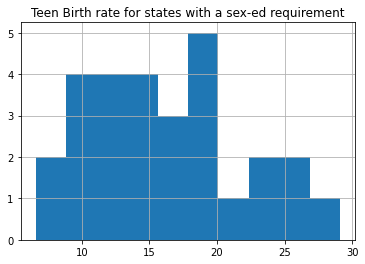

In [9]:
preg_merge[preg_merge['SIECUS sex-ed req EDITED']==1]['State Rate'].hist()
plt.title("Teen Birth rate for states with a sex-ed requirement")

Text(0.5, 1.0, 'Teen Birth rate for states without a sex-ed requirement')

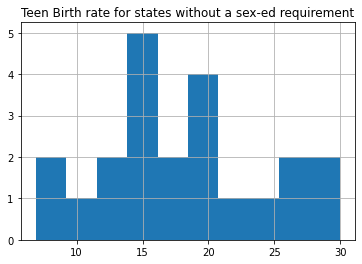

In [10]:
preg_merge[preg_merge['SIECUS sex-ed req EDITED']!=1]['State Rate'].hist()
plt.title("Teen Birth rate for states without a sex-ed requirement")

In [11]:
preg_merge.groupby("SIECUS sex-ed req EDITED", dropna = False).mean()

,SIECUS consent req EDITED,Abstinence (SIECUS),Unnamed: 0,Year,State Rate
SIECUS sex-ed req EDITED,,,,,
1.0,1.0,5.708333,4604.750000,2019.0,16.085714
NaN,1.0,12.555556,4597.318182,2019.0,17.868182


In [12]:
preg_merge.groupby("SIECUS sex-ed req EDITED", dropna = False).median()

,SIECUS consent req EDITED,Abstinence (SIECUS),Unnamed: 0,Year,State Rate
SIECUS sex-ed req EDITED,,,,,
1.0,1.0,2.0,4605.5,2019.0,15.25
NaN,1.0,2.0,4595.5,2019.0,17.25


States that require sex ed have lower teen birth rates

## Contraceptive requirements and teen pregnancy

4. States with no contraceptive requirement have higher rates of teen pregnancy

In [13]:
preg_merge["SIECUS contraception req"].value_counts(dropna=False)

NaN                 30
Cover, expansive    13
Cover, limited       7
Name: SIECUS contraception req, dtype: int64

In [14]:
preg_merge.groupby('SIECUS contraception req', dropna=False).median()

,SIECUS sex-ed req EDITED,SIECUS consent req EDITED,Abstinence (SIECUS),Unnamed: 0,Year,State Rate
SIECUS contraception req,,,,,,
"Cover, expansive",1.0,1.0,2.0,4596.0,2019.0,13.9
"Cover, limited",1.0,1.0,2.0,4622.0,2019.0,21.6
NaN,1.0,1.0,2.0,4599.5,2019.0,17.3


In [15]:
preg_merge[["SIECUS contraception req", "State Rate"]].groupby('SIECUS contraception req', dropna=False).mean()

,State Rate
SIECUS contraception req,
"Cover, expansive",14.023077
"Cover, limited",18.614286
NaN,17.696667


SIECUS contraception req
Cover, expansive    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Cover, limited      [[AxesSubplot(0.125,0.125;0.775x0.755)]]
NaN                 [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

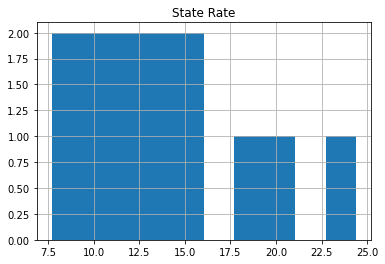

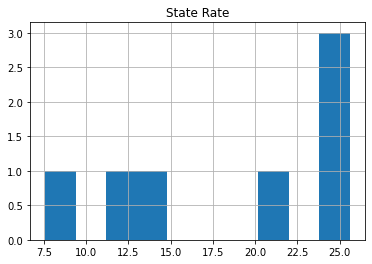

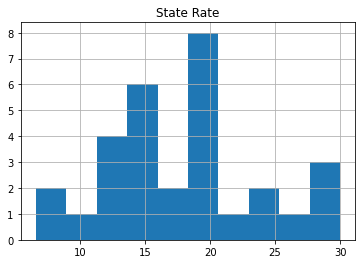

In [16]:
preg_merge[["SIECUS contraception req", "State Rate"]].groupby('SIECUS contraception req', dropna=False).hist()

States that have limited contraception requirements are worse than not having any requirement at all?? 

## Abstinence education versus teen pregnancy

6. States that emphasize/stress (?) abstinence only education have higher rates of teen pregnancy

In [17]:
preg_merge["Abstinence (SIECUS)"].value_counts(dropna=False)

2.0     27
1.0     12
NaN      8
99.0     3
Name: Abstinence (SIECUS), dtype: int64

Abstinence (SIECUS)
1.0     [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
2.0     [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
99.0    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
NaN     [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

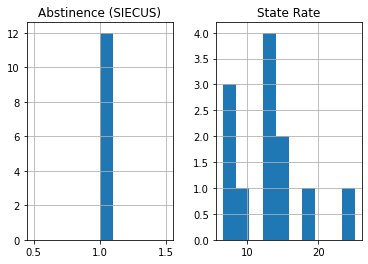

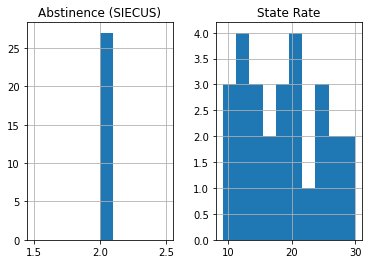

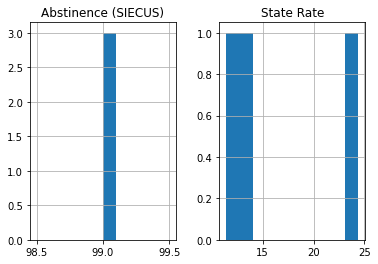

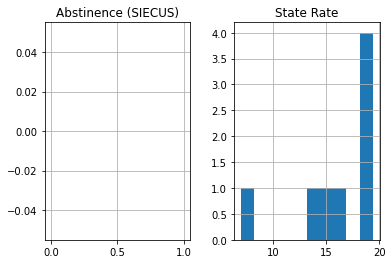

In [18]:
preg_merge[['Abstinence (SIECUS)', 'State Rate']].groupby('Abstinence (SIECUS)', dropna=False).hist()

In [19]:
preg_merge[['Abstinence (SIECUS)', 'State Rate']].groupby('Abstinence (SIECUS)', dropna=False).mean()

,State Rate
Abstinence (SIECUS),
1.0,13.366667
2.0,18.725926
99.0,16.366667
NaN,16.050000


In [20]:
preg_merge[['Abstinence (SIECUS)', 'State Rate']].groupby('Abstinence (SIECUS)', dropna=False).median()

,State Rate
Abstinence (SIECUS),
1.0,13.75
2.0,18.50
99.0,13.30
NaN,17.30


Again, this weird moderating effect: States that have strict abstinence requirements have the highest teen birth rates worst, but states that cover abstinence (without strict abstinence requirements) have lower rates than states with nothing at all. 

## Abstinence education + HIV rates 

7. States that emphasize/stress (?) abstinence only education have higher rates of HIV


Abstinence (SIECUS)
1.0     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
2.0     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
99.0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
NaN     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

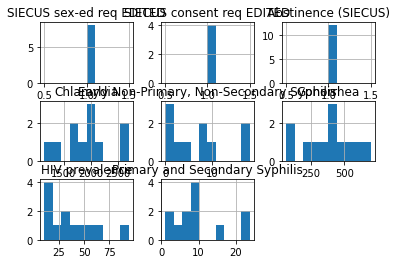

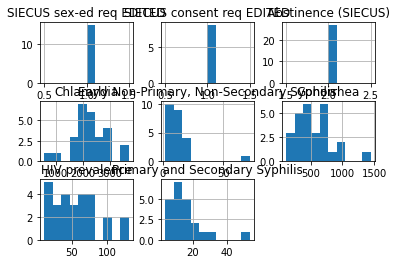

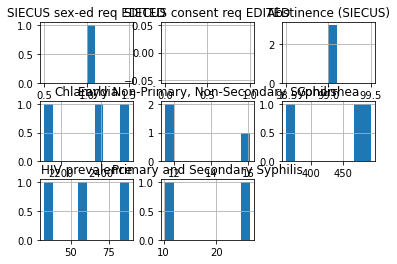

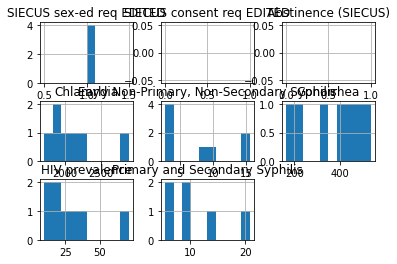

In [21]:
STI_HIV_merge.groupby('Abstinence (SIECUS)', dropna=False).hist()

In [22]:
STI_HIV_merge.groupby('Abstinence (SIECUS)', dropna=False).mean()

,SIECUS sex-ed req EDITED,SIECUS consent req EDITED,Chlamydia,"Early Non-Primary, Non-Secondary Syphilis",Gonorrhea,HIV prevalence,Primary and Secondary Syphilis
Abstinence (SIECUS),,,,,,,
1.0,1.0,1.0,1934.381818,6.9800,377.608333,36.716667,10.083333
2.0,1.0,1.0,2270.474074,13.5625,556.333333,54.840741,15.304545
99.0,1.0,NaN,2350.633333,13.1000,440.733333,58.900000,18.300000
NaN,1.0,NaN,2117.914286,7.9375,367.657143,26.900000,10.766667


In [23]:
STI_HIV_merge.groupby('Abstinence (SIECUS)', dropna=False).median()

,SIECUS sex-ed req EDITED,SIECUS consent req EDITED,Chlamydia,"Early Non-Primary, Non-Secondary Syphilis",Gonorrhea,HIV prevalence,Primary and Secondary Syphilis
Abstinence (SIECUS),,,,,,,
1.0,1.0,1.0,1971.3,6.30,403.1,31.7,8.8
2.0,1.0,1.0,2335.4,11.50,508.3,47.4,12.1
99.0,1.0,NaN,2397.2,11.70,468.7,56.2,18.3
NaN,1.0,NaN,2054.2,6.35,406.7,21.4,9.0


States that teach abstinence have higher rates of HIV. 

## Second set of hypotheses

States with highest rates of teen pregnancy have "worse" sex ed

In [49]:
preg_merge.sort_values("State Rate", ascending = False)

,State,SIECUS sex-ed req EDITED,SIECUS consent req EDITED,SIECUS contraception req,Abortion,Abstinence (SIECUS),Unnamed: 0,Year,Age Group (Years),State Rate,State Births
3,Arkansas,NaN,NaN,NaN,Most Restrictive,2.0,4579,2019,15-19 years,30.0,"2,882"
23,Mississippi,1.0,NaN,NaN,Restrictive,2.0,4600,2019,15-19 years,29.1,"2,869"
17,Louisiana,NaN,NaN,NaN,Restrictive,2.0,4594,2019,15-19 years,27.8,"4,007"
35,Oklahoma,NaN,1.0,NaN,Most Restrictive,2.0,4612,2019,15-19 years,27.4,"3,520"
0,Alabama,NaN,NaN,"Cover, limited",Most Restrictive,2.0,4576,2019,15-19 years,25.6,"3,955"
47,West Virginia,1.0,NaN,"Cover, limited",Most Restrictive (Our Interpretation),1.0,4625,2019,15-19 years,25.2,"1,287"
16,Kentucky,1.0,NaN,NaN,Restrictive,2.0,4593,2019,15-19 years,24.9,"3,464"
30,New Mexico,1.0,NaN,"Cover, expansive",NaN,99.0,4607,2019,15-19 years,24.4,"1,659"
42,Texas,NaN,NaN,"Cover, limited",Most Restrictive,2.0,4619,2019,15-19 years,24.0,"24,109"
41,Tennessee,1.0,NaN,NaN,Very Restrictive,2.0,4618,2019,15-19 years,23.7,"4,918"


In [48]:
preg_merge.sort_values("State Rate", ascending = False).head(15).to_csv("..//data//processed//top_15_preg.csv")

Of the 15 states with the highest teen birth rates: 
* 13 states (all but Wyoming and New Mexico) had restrictive abortion laws
* 12 stress abstinence
* 2 have expansive contraception ed requirements
* 2 are required to teach consent

Of the 15 states with the lowest teen birth rates: 
* 3 (Utah, Wisconsin, and Pennsylvania) had restrictive abortion laws
* 7 stress abstinence
* 6 have expansive contraception ed requirements
* 5 are required to teach consent

"Of the 15 states with the highest teen birth rates, over 85% had restrictive abortion laws. But only 20% of the states with the lowest teen birth rates had similar laws."

Graphics could be maps highlighting the specific states. 

Now the STD/HIV analog: States with worse STD rates have worse sex ed. 

In [46]:
STI_HIV_merge.sort_values("Chlamydia", ascending = False).tail(15)

,State,SIECUS sex-ed req EDITED,SIECUS consent req EDITED,SIECUS contraception req,Abortion,Abstinence (SIECUS),Geography,Chlamydia,"Early Non-Primary, Non-Secondary Syphilis",Gonorrhea,HIV prevalence,Primary and Secondary Syphilis
33,North Dakota,1.0,NaN,NaN,Restrictive,1.0,North Dakota,1887.4,2.3,421.4,17.8,5.5
25,Montana,1.0,NaN,NaN,NaN,NaN,Montana,1850.9,3.7,333.1,9.9,8.7
29,New Jersey,1.0,1.0,"Cover, expansive",NaN,2.0,New Jersey,1829.6,13.8,339.5,58.9,11.4
36,Oregon,1.0,1.0,"Cover, expansive",NaN,2.0,Oregon,1815.7,6.1,287.4,18.1,7.6
22,Minnesota,1.0,NaN,NaN,NaN,1.0,Minnesota,1749.3,9.0,366.8,28.6,9.4
20,Massachusetts,NaN,NaN,NaN,NaN,NaN,Massachusetts,1718.4,8.9,220.1,35.3,NaN
6,Connecticut,NaN,NaN,"Cover, expansive",NaN,1.0,Connecticut,1714.3,7.4,313.0,36.3,9.9
42,Texas,NaN,NaN,"Cover, limited",Most Restrictive,2.0,Texas,1673.1,NaN,439.1,75.3,12.8
11,Idaho,NaN,NaN,NaN,Restrictive,2.0,Idaho,1571.1,2.7,180.5,10.5,3.7
47,West Virginia,1.0,NaN,"Cover, limited",Most Restrictive (Our Interpretation),1.0,West Virginia,1381.9,8.5,228.1,22.8,6.2


In [37]:
STI_HIV_merge.sort_values("Early Non-Primary, Non-Secondary Syphilis", ascending = False)

,State,SIECUS sex-ed req EDITED,SIECUS consent req EDITED,SIECUS contraception req,Abortion,Abstinence (SIECUS),Geography,Chlamydia,"Early Non-Primary, Non-Secondary Syphilis",Gonorrhea,HIV prevalence,Primary and Secondary Syphilis
23,Mississippi,1.0,NaN,NaN,Restrictive,2.0,Mississippi,3703.1,72.2,1446.1,95.6,53.3
17,Louisiana,NaN,NaN,NaN,Restrictive,2.0,Louisiana,3478.0,20.5,937.2,121.5,33.0
0,Alabama,NaN,NaN,"Cover, limited",Most Restrictive,2.0,Alabama,2868.1,20.0,1015.1,79.5,24.4
2,Arizona,NaN,NaN,NaN,Restrictive,2.0,Arizona,2193.5,19.2,486.3,46.8,NaN
19,Maryland,1.0,1.0,"Cover, expansive",NaN,1.0,Maryland,2708.3,18.0,514.3,94.1,21.8
39,South Carolina,1.0,NaN,"Cover, limited",Very Restrictive,2.0,South Carolina,3063.5,17.4,879.0,81.3,14.3
4,California,1.0,NaN,"Cover, expansive",NaN,1.0,California,1971.3,16.9,389.3,49.1,23.8
31,New York,NaN,NaN,NaN,NaN,99.0,New York,2397.2,16.1,492.6,88.0,NaN
41,Tennessee,1.0,NaN,NaN,Very Restrictive,2.0,Tennessee,2589.5,15.9,750.1,63.4,15.2
3,Arkansas,NaN,NaN,NaN,Most Restrictive,2.0,Arkansas,2488.9,15.7,749.3,59.0,NaN


In [38]:
STI_HIV_merge.sort_values("Gonorrhea", ascending = False)

,State,SIECUS sex-ed req EDITED,SIECUS consent req EDITED,SIECUS contraception req,Abortion,Abstinence (SIECUS),Geography,Chlamydia,"Early Non-Primary, Non-Secondary Syphilis",Gonorrhea,HIV prevalence,Primary and Secondary Syphilis
23,Mississippi,1.0,NaN,NaN,Restrictive,2.0,Mississippi,3703.1,72.2,1446.1,95.6,53.3
0,Alabama,NaN,NaN,"Cover, limited",Most Restrictive,2.0,Alabama,2868.1,20.0,1015.1,79.5,24.4
17,Louisiana,NaN,NaN,NaN,Restrictive,2.0,Louisiana,3478.0,20.5,937.2,121.5,33.0
39,South Carolina,1.0,NaN,"Cover, limited",Very Restrictive,2.0,South Carolina,3063.5,17.4,879.0,81.3,14.3
32,North Carolina,1.0,NaN,"Cover, expansive",NaN,2.0,North Carolina,2803.0,11.9,750.4,77.9,15.7
41,Tennessee,1.0,NaN,NaN,Very Restrictive,2.0,Tennessee,2589.5,15.9,750.1,63.4,15.2
3,Arkansas,NaN,NaN,NaN,Most Restrictive,2.0,Arkansas,2488.9,15.7,749.3,59.0,NaN
35,Oklahoma,NaN,1.0,NaN,Most Restrictive,2.0,Oklahoma,2385.3,10.8,709.0,34.4,21.7
24,Missouri,NaN,1.0,"Cover, expansive",Most Restrictive,2.0,Missouri,2360.6,14.7,708.4,47.4,15.3
12,Illinois,NaN,1.0,"Cover, expansive",NaN,1.0,Illinois,2558.0,NaN,698.2,65.0,15.0


In [45]:
STI_HIV_merge.sort_values("HIV prevalence", ascending = False).tail(15)

,State,SIECUS sex-ed req EDITED,SIECUS consent req EDITED,SIECUS contraception req,Abortion,Abstinence (SIECUS),Geography,Chlamydia,"Early Non-Primary, Non-Secondary Syphilis",Gonorrhea,HIV prevalence,Primary and Secondary Syphilis
26,Nebraska,NaN,NaN,NaN,Restrictive,NaN,Nebraska,1910.7,2.8,406.7,23.1,13.4
47,West Virginia,1.0,NaN,"Cover, limited",Most Restrictive (Our Interpretation),1.0,West Virginia,1381.9,8.5,228.1,22.8,6.2
10,Hawaii,1.0,NaN,"Cover, expansive",NaN,2.0,Hawaii,2401.1,11.1,251.8,20.4,11.1
14,Iowa,1.0,NaN,NaN,Restrictive,NaN,Iowa,2054.2,3.8,426.5,19.7,6.9
1,Alaska,NaN,NaN,NaN,NaN,NaN,Alaska,2890.6,15.6,NaN,18.1,20.8
36,Oregon,1.0,1.0,"Cover, expansive",NaN,2.0,Oregon,1815.7,6.1,287.4,18.1,7.6
33,North Dakota,1.0,NaN,NaN,Restrictive,1.0,North Dakota,1887.4,2.3,421.4,17.8,5.5
43,Utah,1.0,NaN,NaN,Restrictive,2.0,Utah,1053.2,1.9,153.4,17.7,4.2
44,Vermont,1.0,NaN,"Cover, limited",NaN,1.0,Vermont,NaN,1.0,75.0,17.0,1.0
18,Maine,1.0,1.0,"Cover, expansive",NaN,2.0,Maine,578.1,6.1,112.2,15.4,7.2


Not sure if there's too much compelling results on STDs or HIV

## Race

In [26]:
preg_race = pd.read_csv(preg_race_str)
preg_race.columns

Index(['Unnamed: 0', 'State', 'Race/Ethnicity', 'Fertility Rate'], dtype='object')

In [27]:
preg_race_pivot = pd.pivot_table(preg_race, values='Fertility Rate', index=['State'], columns=["Race/Ethnicity"], aggfunc=np.sum)

In [28]:
preg_race_merge = sex_ed_policy.merge(preg_race_pivot, left_on= "State", right_on="State")

In [29]:
preg_race_merge.head(15)

,State,SIECUS sex-ed req EDITED,SIECUS consent req EDITED,SIECUS contraception req,Abortion,Abstinence (SIECUS),American Indian or Alaska Native,Asian,Black or African American,Hispanic or Latino,More than one race,Native Hawaiian or Other Pacific Islander,White
0,Alabama,NaN,NaN,"Cover, limited",Most Restrictive,2.0,11.56,NaN,31.55,57.26,28.52,NaN,18.44
1,Alaska,NaN,NaN,NaN,NaN,NaN,34.11,NaN,18.69,15.79,21.99,39.09,10.47
2,Arizona,NaN,NaN,NaN,Restrictive,2.0,25.51,1.92,19.06,24.27,11.27,NaN,8.38
3,Arkansas,NaN,NaN,NaN,Most Restrictive,2.0,13.28,8.24,41.37,32.45,25.85,52.93,23.17
4,California,1.0,NaN,"Cover, expansive",NaN,1.0,18.17,1.25,14.09,15.95,6.38,10.42,4.83
5,Colorado,NaN,1.0,"Cover, expansive",NaN,1.0,19.11,3.90,17.98,24.39,10.97,NaN,5.72
6,Connecticut,NaN,NaN,"Cover, expansive",NaN,1.0,NaN,NaN,11.27,20.66,11.00,NaN,2.44
7,Delaware,1.0,1.0,NaN,NaN,2.0,NaN,NaN,19.64,32.23,18.71,NaN,7.60
8,Florida,NaN,NaN,NaN,Restrictive,2.0,10.40,1.54,23.05,17.80,13.08,NaN,10.73
9,Georgia,1.0,NaN,NaN,Restrictive,2.0,NaN,2.52,22.01,30.05,19.08,NaN,13.01


In [30]:
preg_race_merge['bw_diff'] = preg_race_merge['Black or African American']-preg_race_merge.White

In [31]:
preg_race_merge.sort_values('bw_diff')

,State,SIECUS sex-ed req EDITED,SIECUS consent req EDITED,SIECUS contraception req,Abortion,Abstinence (SIECUS),American Indian or Alaska Native,Asian,Black or African American,Hispanic or Latino,More than one race,Native Hawaiian or Other Pacific Islander,White,bw_diff
47,West Virginia,1.0,NaN,"Cover, limited",Most Restrictive (Our Interpretation),1.0,NaN,NaN,17.14,20.90,22.66,NaN,22.87,-5.73
18,Maine,1.0,1.0,"Cover, expansive",NaN,2.0,NaN,NaN,13.54,17.43,13.56,NaN,10.40,3.14
46,Washington,1.0,1.0,"Cover, limited",NaN,2.0,22.11,1.42,11.42,22.83,9.54,24.55,7.56,3.86
16,Kentucky,1.0,NaN,NaN,Restrictive,2.0,NaN,NaN,28.34,39.22,22.36,NaN,22.66,5.68
30,New Mexico,1.0,NaN,"Cover, expansive",NaN,99.0,26.46,NaN,21.42,24.43,8.63,NaN,15.34,6.08
35,Oklahoma,NaN,1.0,NaN,Most Restrictive,2.0,25.84,3.35,27.63,34.35,33.29,93.22,20.92,6.71
20,Massachusetts,NaN,NaN,NaN,NaN,NaN,NaN,1.35,9.64,21.54,4.79,NaN,2.29,7.35
36,Oregon,1.0,1.0,"Cover, expansive",NaN,2.0,15.35,NaN,15.45,17.59,8.82,18.81,7.83,7.62
1,Alaska,NaN,NaN,NaN,NaN,NaN,34.11,NaN,18.69,15.79,21.99,39.09,10.47,8.22
40,South Dakota,NaN,NaN,NaN,Most Restrictive,1.0,59.04,NaN,18.07,42.15,28.62,NaN,9.77,8.30


In [32]:
preg_race_merge['Black or African American'].mean()

23.912888888888894

In [33]:
preg_race_merge['White'].mean()

10.780000000000003

In [34]:
preg_race_merge['Hispanic or Latino'].mean()

28.013265306122445

"Around the country, Black or Hispanic teen births are more common than white teen births in every state except for West Virginia."

"But the states where Black teen fertility is much higher than white teen fertility are also often the states with more restrictive abortion policies." (similar if you look at Hispanic-white gaps) 

For the 15 states with the highest different in Black-white teen fertility rate, 12 have restrictive abortion policies. For the 15 states with the lower diffrerence, only 6 have restrictive abortion policies. 

4 for smallest gaps 
10 for largest gaps 


In [35]:
preg_race_merge['bh_diff'] = preg_race_merge['Hispanic or Latino']-preg_race_merge.White

In [36]:
preg_race_merge.sort_values("bh_diff")

,State,SIECUS sex-ed req EDITED,SIECUS consent req EDITED,SIECUS contraception req,Abortion,Abstinence (SIECUS),American Indian or Alaska Native,Asian,Black or African American,Hispanic or Latino,More than one race,Native Hawaiian or Other Pacific Islander,White,bw_diff,bh_diff
47,West Virginia,1.0,NaN,"Cover, limited",Most Restrictive (Our Interpretation),1.0,NaN,NaN,17.14,20.90,22.66,NaN,22.87,-5.73,-1.97
1,Alaska,NaN,NaN,NaN,NaN,NaN,34.11,NaN,18.69,15.79,21.99,39.09,10.47,8.22,5.32
28,New Hampshire,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,12.70,NaN,NaN,6.32,NaN,6.38
18,Maine,1.0,1.0,"Cover, expansive",NaN,2.0,NaN,NaN,13.54,17.43,13.56,NaN,10.40,3.14,7.03
8,Florida,NaN,NaN,NaN,Restrictive,2.0,10.40,1.54,23.05,17.80,13.08,NaN,10.73,12.32,7.07
30,New Mexico,1.0,NaN,"Cover, expansive",NaN,99.0,26.46,NaN,21.42,24.43,8.63,NaN,15.34,6.08,9.09
3,Arkansas,NaN,NaN,NaN,Most Restrictive,2.0,13.28,8.24,41.37,32.45,25.85,52.93,23.17,18.20,9.28
12,Illinois,NaN,1.0,"Cover, expansive",NaN,1.0,NaN,1.23,28.44,17.84,16.55,NaN,8.12,20.32,9.72
36,Oregon,1.0,1.0,"Cover, expansive",NaN,2.0,15.35,NaN,15.45,17.59,8.82,18.81,7.83,7.62,9.76
27,Nevada,1.0,NaN,NaN,NaN,NaN,24.39,3.93,30.81,20.21,17.52,23.36,10.07,20.74,10.14


Half of all states (25) have some sort of restriction on abortions 
